## Women's National Basketball Association Data Analysis

The data set is about basketball players in WNBA and contains general information about players, along with their metrics for the season 2016-2017. The data set was put together by Thomas De Jonghe, and can be downloaded from Kaggle, where you can also find useful documentation for the data set.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
wnba = pd.read_csv('wnba.csv')

In [38]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


In [39]:
wnba.tail()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
138,Tiffany Hayes,ATL,G,178,70.0,22.093170,US,"September 20, 1989",27,Connecticut,...,28,89,117,69,37,8,50,467,0,0
139,Tiffany Jackson,LA,F,191,84.0,23.025685,US,"April 26, 1985",32,Texas,...,5,18,23,3,1,3,8,28,0,0
140,Tiffany Mitchell,IND,G,175,69.0,22.530612,US,"September 23, 1984",32,South Carolina,...,16,70,86,39,31,5,40,277,0,0
141,Tina Charles,NY,F/C,193,84.0,22.550941,US,"May 12, 1988",29,Connecticut,...,56,212,268,75,21,22,71,582,11,0
142,Yvonne Turner,PHO,G,175,59.0,19.265306,US,"October 13, 1987",29,Nebraska,...,11,13,24,30,18,1,32,151,0,0


In [40]:
wnba.shape

(143, 32)

In [41]:
parameter = wnba['Games Played'].max()
print(parameter)

32


#### Creating a sample

In [42]:
sample = wnba['Games Played'].sample(30, random_state = 1)

In [43]:
statistic = sample.max()
print(statistic)

30


#### Finding sampling error

In [44]:
sampling_error = parameter - statistic
print(sampling_error)

2


#### Creating many samples

In [45]:
lst=[]
for i in range(100):
    sample = wnba['PTS'].sample(10,random_state=i)
    lst.append(sample.mean())

#### Checking for discrepancy

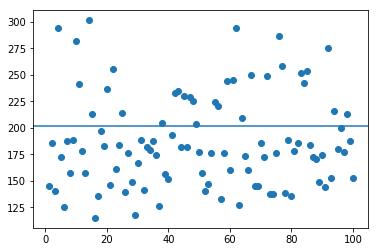

In [46]:
plt.scatter(range(1,101), lst)
plt.axhline(wnba['PTS'].mean())

In [47]:
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']

In [48]:
stratum_G = wnba[wnba.Pos == 'G']
stratum_F = wnba[wnba.Pos == 'F']
stratum_C = wnba[wnba.Pos == 'C']
stratum_GF = wnba[wnba.Pos == 'G/F']
stratum_FC = wnba[wnba.Pos == 'F/C']

In [49]:
points_per_position = {}
for stratum, position in [(stratum_G, 'G'), (stratum_F, 'F'),(stratum_C, 'C'), (stratum_GF, 'G/F'), (stratum_FC, 'F/C')]:
    sample = stratum['Pts_per_game'].sample(10, random_state = 0)
    points_per_position[position] = sample.mean()

In [50]:
position_most_points = max(points_per_position, key = points_per_position.get)
print(position_most_points)

C


In [51]:
print(wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100)

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64


## Checking stratified sampling

In [52]:
under_12 = wnba[wnba['Games Played']<=12]
between = wnba[(wnba['Games Played']>12) & (wnba['Games Played']<=22)]
above_22 = wnba[wnba['Games Played']>22]

In [53]:
lst1=[]
for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state=i)
    sample_between = between['PTS'].sample(2, random_state=i)
    sample_above_22 = above_22['PTS'].sample(7, random_state=i)
    final_sample = pd.concat([sample_under_12,sample_between,sample_above_22])
    lst1.append(final_sample.mean())

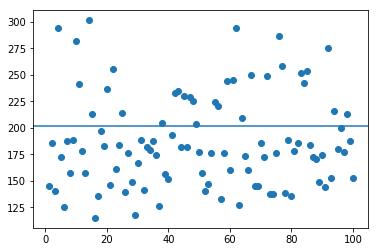

In [54]:
plt.scatter(range(1,101),lst)
plt.axhline(wnba['PTS'].mean())

In [59]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

In [60]:
for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

In [61]:
sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

In [62]:
print(sampling_error_height)
print(sampling_error_age)
print(sampling_error_BMI)
print(sampling_error_points)

-0.06400121617511445
-1.401337792642142
0.23095444165950596
-27.79674673152934
